# Introduction

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI)

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

In [143]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from scipy.stats import pearsonr

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Data Exploring

In [144]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

### Dataset Report

In [145]:
data.shape

(253680, 22)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [147]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [148]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# EDA

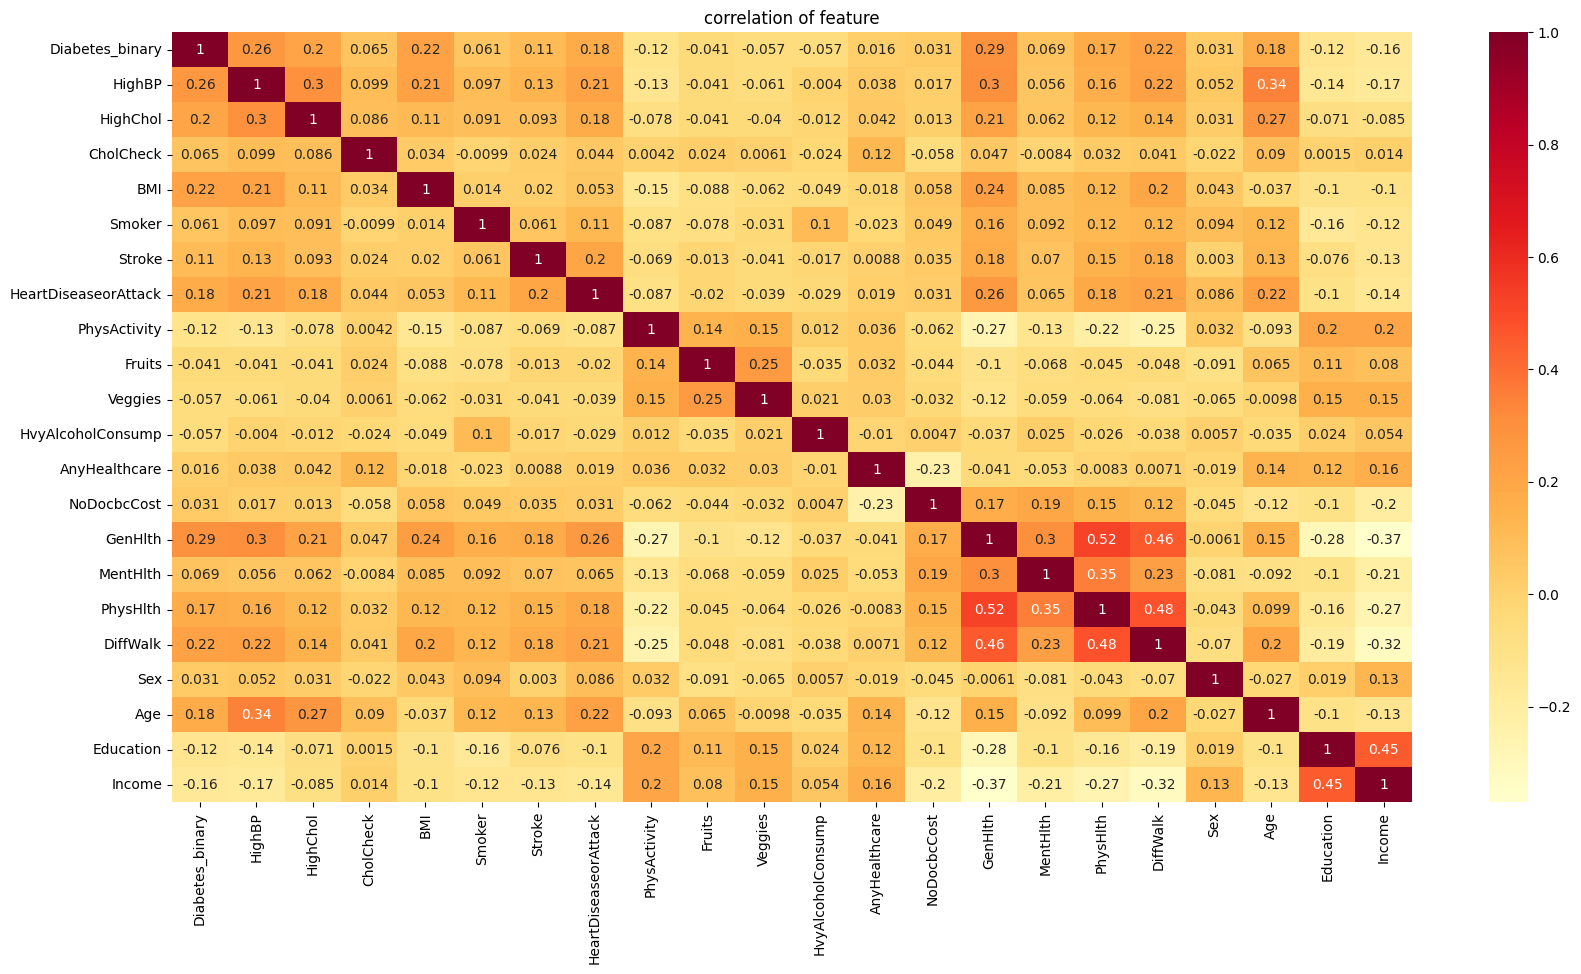

In [149]:

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()


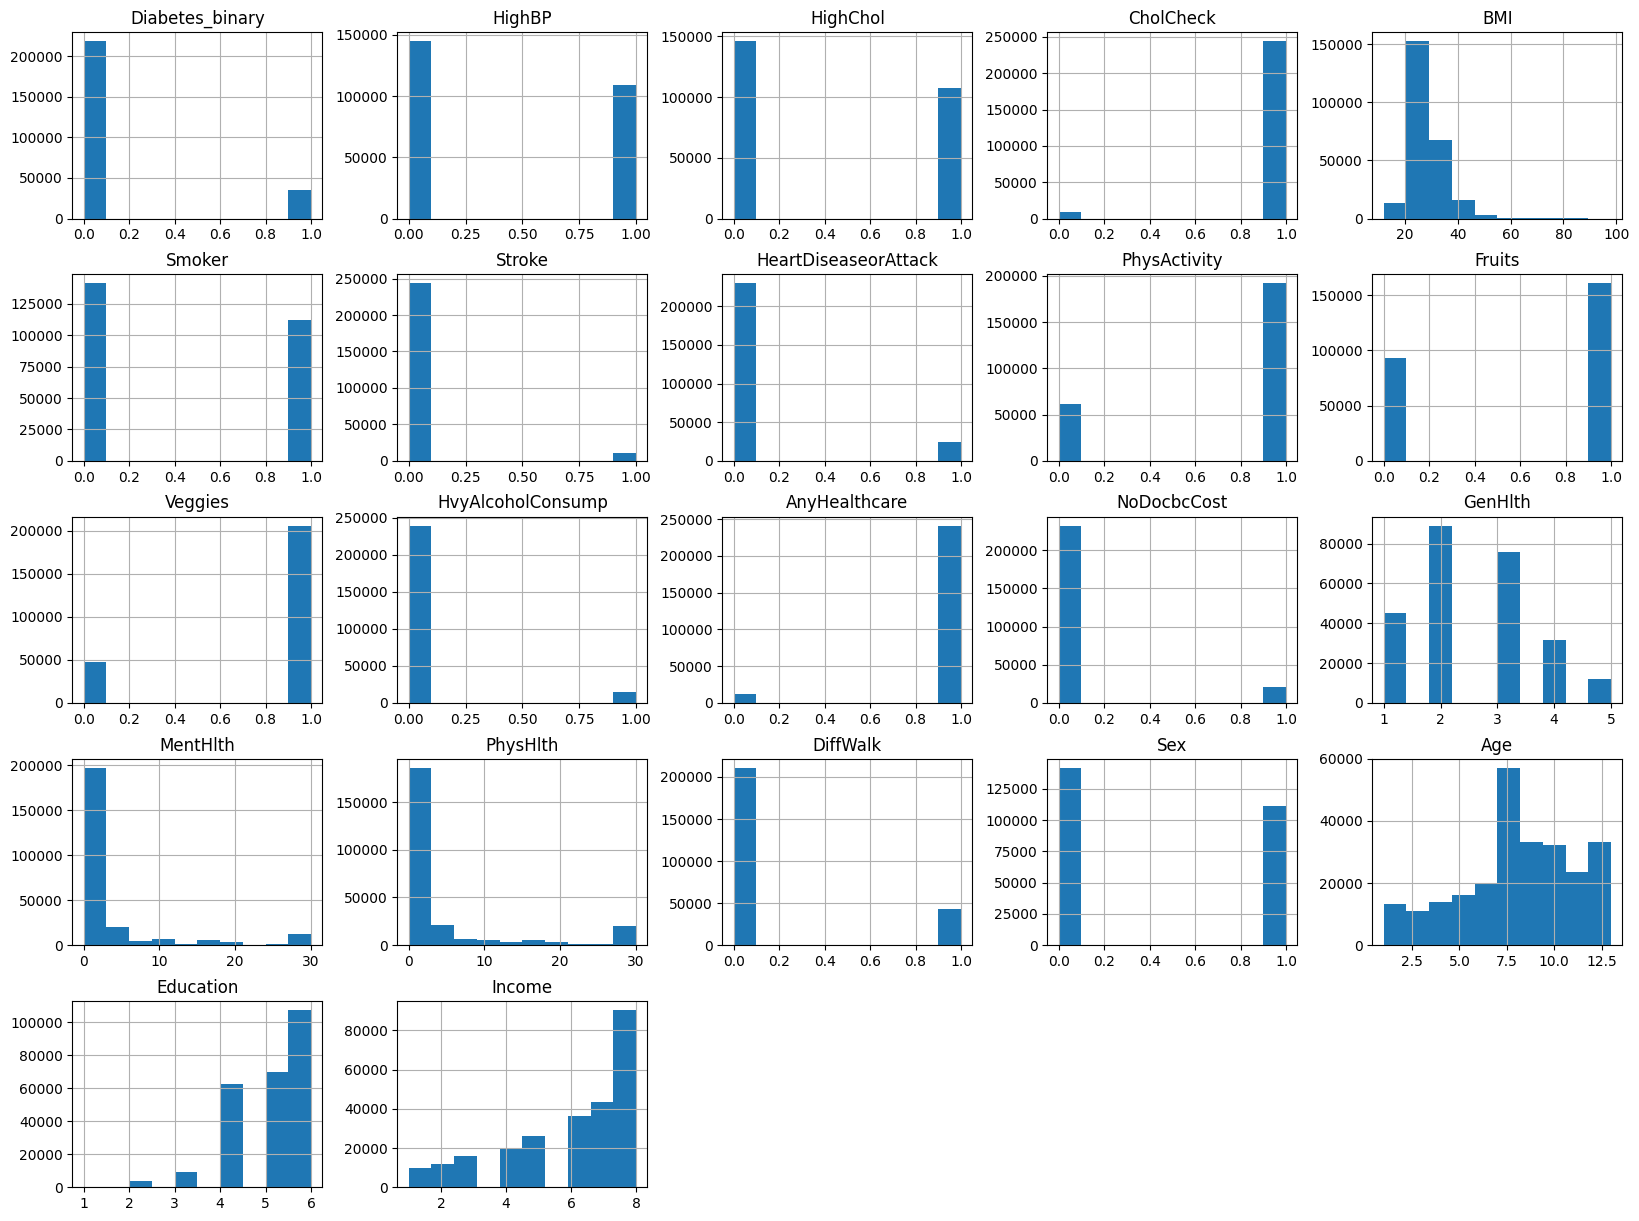

In [150]:
data.hist(figsize=(20,15));

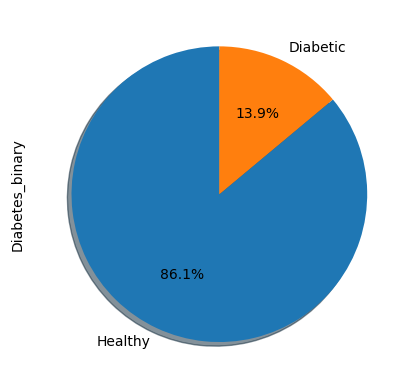

In [151]:
labels = 'Healthy','Diabetic'

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

# Preprocessing

### Dealing with imbalancing

In [152]:
df_features = data.drop("Diabetes_binary",axis=1)
df_target = data["Diabetes_binary"]

In [153]:
df_target.value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [154]:
nm = NearMiss(version = 1 , n_neighbors = 10)

df_features, df_target = nm.fit_resample(df_features, df_target)

In [155]:
df_features.shape , df_target.shape

((70692, 21), (70692,))

### Check and drop dublicated data

In [156]:
data.duplicated().sum()

24206

In [157]:
data.drop_duplicates(inplace = True)

In [158]:
data.duplicated().sum()

0

## Feature Selection

In [159]:
threshold = 10

### Mutual Information

In [160]:
high_score_features_mic = []
feature_scores = mutual_info_classif(df_features, df_target, random_state=0)
for score, f_name in sorted(zip(feature_scores, df_features.columns), reverse=True)[:threshold]:
        high_score_features_mic.append(f_name)
        
print(high_score_features_mic)

['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'Education', 'PhysActivity', 'HighBP', 'Veggies']


### Chi-Squared

In [161]:
skb = SelectKBest(score_func=chi2, k=threshold)
sel_skb = skb.fit(df_features, df_target)
sel_skb_index = sel_skb.get_support()
df_norm_skb = df_features.iloc[:, sel_skb_index]
high_score_features_skb = list(df_norm_skb.columns)
print(high_score_features_skb)


['HighBP', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Income']


### Pearson Correlation

In [162]:
pearson_list = []
for l in list(df_features.columns):
    p,_ = pearsonr(df_features[l], df_target)
    pearson_list.append(abs(p))
    
p_value=pd.Series(pearson_list,index=df_features.columns)
p_value.sort_values(ascending=False,inplace=True)
high_score_features_pearson = list(p_value.index[:threshold])
print(high_score_features_pearson)

['GenHlth', 'Income', 'DiffWalk', 'PhysHlth', 'Education', 'PhysActivity', 'BMI', 'MentHlth', 'HighBP', 'HeartDiseaseorAttack']


### Best of all

In [163]:
high_score_features = []
for h in  high_score_features_mic:
    if h in high_score_features_skb and h in high_score_features_pearson:
        high_score_features.append(h)

print(high_score_features)
# ['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'HighBP']

['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'HighBP']


# Data Splitting

In [164]:
y = df_target

features_list = [
    ["mic 5", df_features[high_score_features_mic[:5]]],
    ["mic 10", df_features[high_score_features_mic]],
    ["skb 5", df_features[high_score_features_skb[:5]]],
    ["skb 10", df_features[high_score_features_skb]],
    ["pearson 5", df_features[high_score_features_pearson[:5]]],
    ["pearson 10", df_features[high_score_features_pearson]],
    ["best 7",df_features[high_score_features]],
    ["all",df_features],
]


# Data Scalling

In [165]:
scalar = StandardScaler()
data = []

for name, X in features_list:
    data.append([name, scalar.fit_transform(X)])
    

In [166]:
splited_data = []
for name, X in data:
    X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)
    splited_data.append({
            'name': name ,'X_train': X_train,
            'X_test':X_test,'y_train':y_train,
            'y_test':y_test
        })
    


# Modeling

In [167]:
evaluations = pd.DataFrame()

## 21 features

In [168]:
data = splited_data[7]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [169]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:10<00:00,  2.57s/it]


In [170]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [171]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,all,0.944363
0,Logistic Regression,all,0.943576
2,Decision Tree,all,0.912083
3,KNN,all,0.905948


Logistic Regression with all
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89     10714
         1.0       0.92      0.83      0.87     10494

    accuracy                           0.88     21208
   macro avg       0.88      0.88      0.88     21208
weighted avg       0.88      0.88      0.88     21208



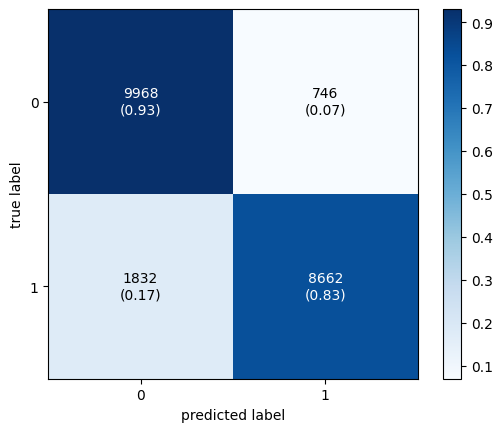

----------------------------------------------------------------------
Random Forest with all
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88     10714
         1.0       0.94      0.79      0.86     10494

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



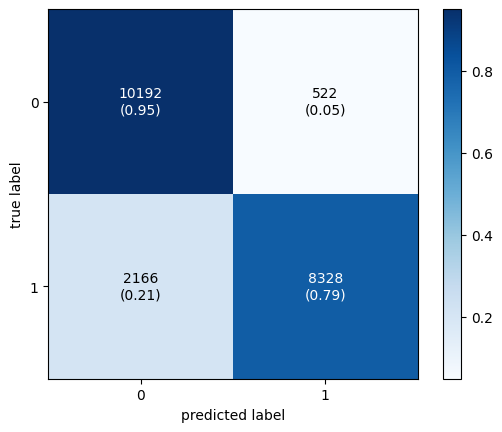

----------------------------------------------------------------------
Decision Tree with all
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86     10714
         1.0       0.93      0.75      0.83     10494

    accuracy                           0.85     21208
   macro avg       0.86      0.85      0.85     21208
weighted avg       0.86      0.85      0.85     21208



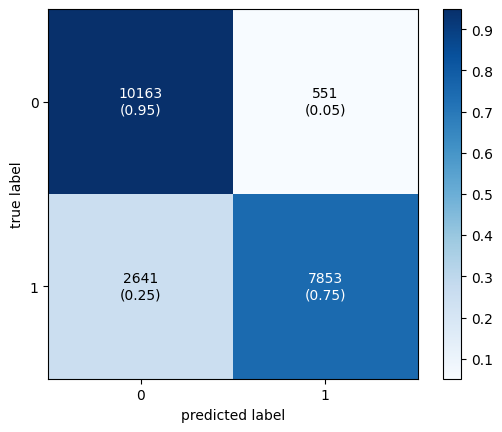

----------------------------------------------------------------------
KNN with all
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85     10714
         1.0       0.88      0.78      0.83     10494

    accuracy                           0.84     21208
   macro avg       0.85      0.84      0.84     21208
weighted avg       0.85      0.84      0.84     21208



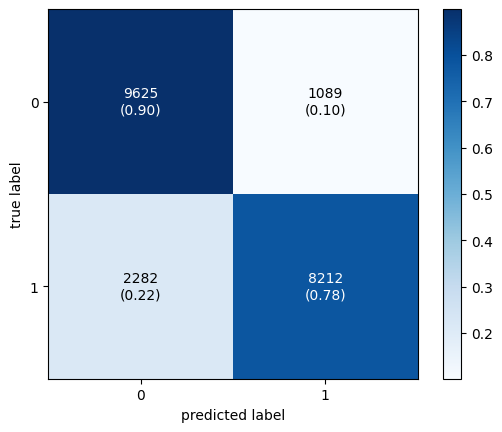

----------------------------------------------------------------------


In [172]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Mutual Information with 5 features

In [173]:
data = splited_data[0]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [174]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


In [175]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [176]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,mic 5,0.918904
0,Logistic Regression,mic 5,0.916535
2,Decision Tree,mic 5,0.903296
3,KNN,mic 5,0.899110


Logistic Regression with mic 5
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86     10513
         1.0       0.92      0.76      0.84     10695

    accuracy                           0.85     21208
   macro avg       0.86      0.85      0.85     21208
weighted avg       0.86      0.85      0.85     21208



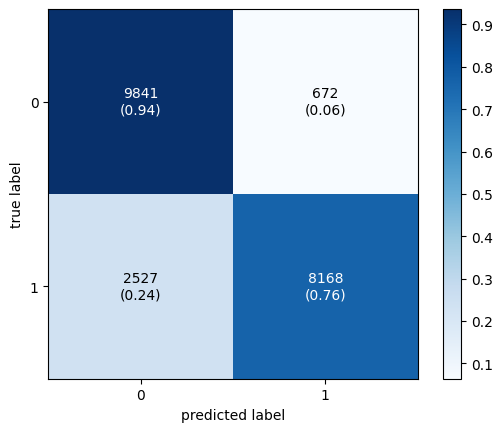

----------------------------------------------------------------------
Random Forest with mic 5
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86     10513
         1.0       0.92      0.77      0.84     10695

    accuracy                           0.85     21208
   macro avg       0.86      0.85      0.85     21208
weighted avg       0.86      0.85      0.85     21208



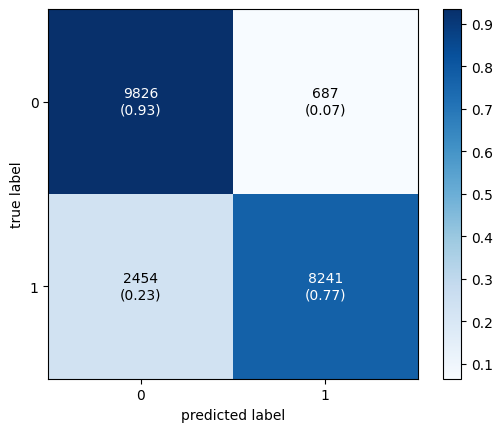

----------------------------------------------------------------------
Decision Tree with mic 5
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85     10513
         1.0       0.89      0.78      0.83     10695

    accuracy                           0.84     21208
   macro avg       0.84      0.84      0.84     21208
weighted avg       0.85      0.84      0.84     21208



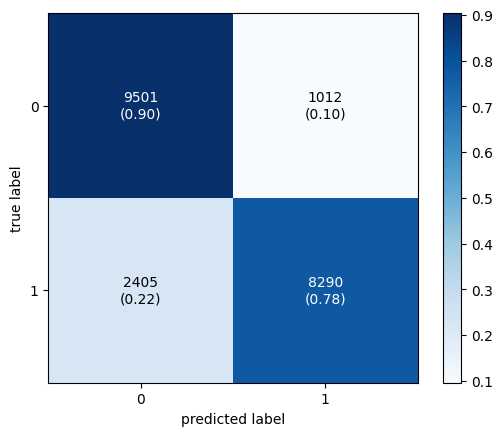

----------------------------------------------------------------------
KNN with mic 5
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.77     10513
         1.0       0.76      0.87      0.81     10695

    accuracy                           0.79     21208
   macro avg       0.80      0.79      0.79     21208
weighted avg       0.80      0.79      0.79     21208



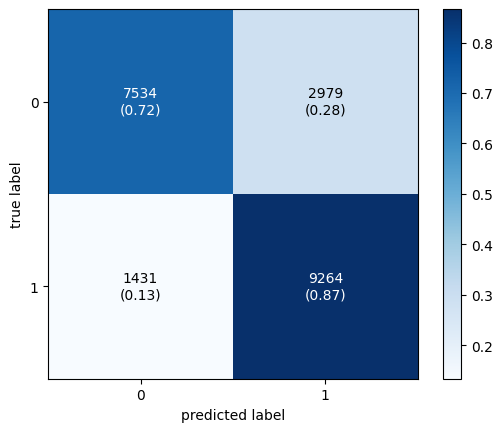

----------------------------------------------------------------------


In [177]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Mutual Information with 10 features

In [178]:
data = splited_data[1]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [179]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:10<00:00,  2.51s/it]


In [180]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [181]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,mic 10,0.942192
0,Logistic Regression,mic 10,0.940757
3,KNN,mic 10,0.919430
2,Decision Tree,mic 10,0.915485


Logistic Regression with mic 10
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     10592
         1.0       0.91      0.82      0.87     10616

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



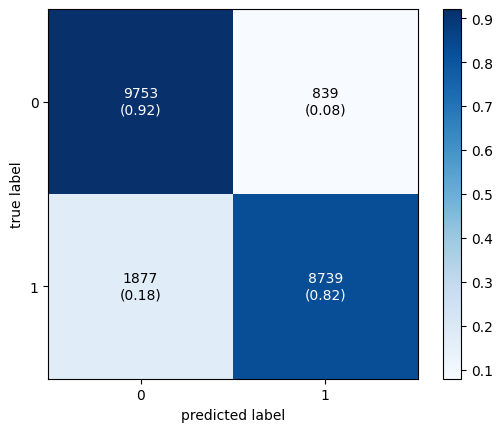

----------------------------------------------------------------------
Random Forest with mic 10
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88     10592
         1.0       0.94      0.80      0.86     10616

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



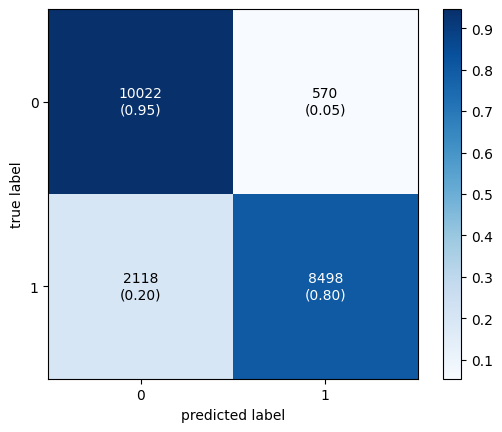

----------------------------------------------------------------------
Decision Tree with mic 10
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.86     10592
         1.0       0.94      0.76      0.84     10616

    accuracy                           0.85     21208
   macro avg       0.87      0.85      0.85     21208
weighted avg       0.87      0.85      0.85     21208



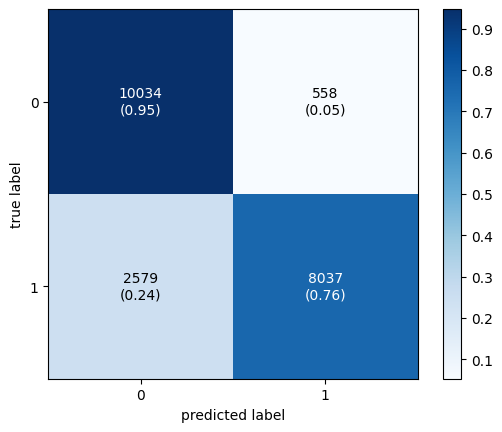

----------------------------------------------------------------------
KNN with mic 10
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86     10592
         1.0       0.87      0.82      0.85     10616

    accuracy                           0.85     21208
   macro avg       0.85      0.85      0.85     21208
weighted avg       0.85      0.85      0.85     21208



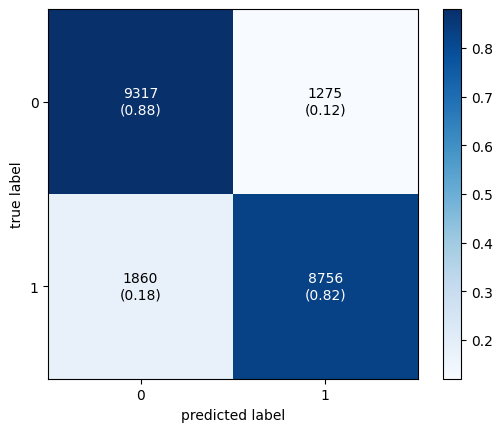

----------------------------------------------------------------------


In [182]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Chi-Squared with 5 features

In [183]:
data = splited_data[2]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [184]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


In [185]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [186]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,skb 5,0.816977
0,Logistic Regression,skb 5,0.802174
2,Decision Tree,skb 5,0.799721
3,KNN,skb 5,0.778334


Logistic Regression with skb 5
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75     10561
         1.0       0.77      0.65      0.71     10647

    accuracy                           0.73     21208
   macro avg       0.74      0.73      0.73     21208
weighted avg       0.74      0.73      0.73     21208



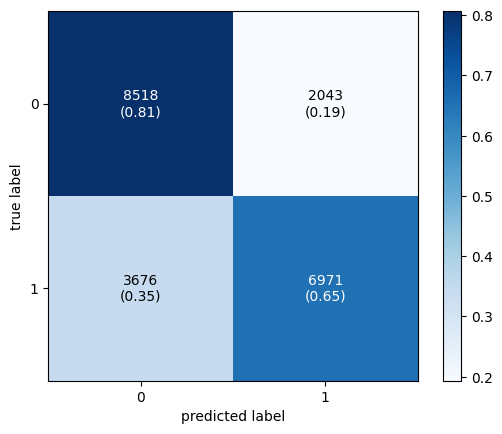

----------------------------------------------------------------------
Random Forest with skb 5
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77     10561
         1.0       0.83      0.60      0.69     10647

    accuracy                           0.74     21208
   macro avg       0.76      0.74      0.73     21208
weighted avg       0.76      0.74      0.73     21208



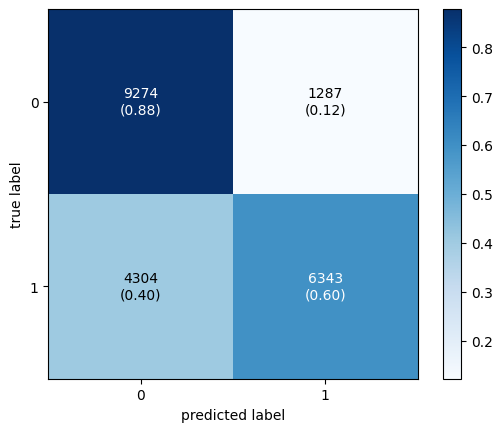

----------------------------------------------------------------------
Decision Tree with skb 5
              precision    recall  f1-score   support

         0.0       0.68      0.87      0.76     10561
         1.0       0.82      0.59      0.69     10647

    accuracy                           0.73     21208
   macro avg       0.75      0.73      0.73     21208
weighted avg       0.75      0.73      0.73     21208



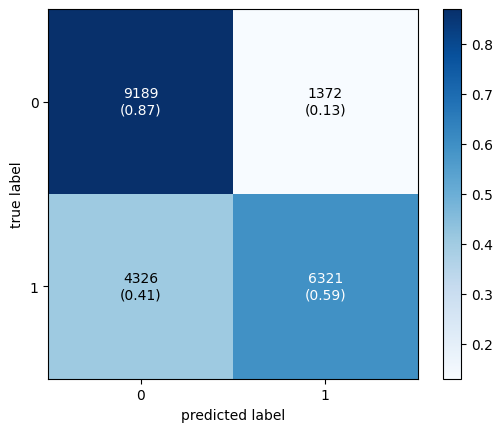

----------------------------------------------------------------------
KNN with skb 5
              precision    recall  f1-score   support

         0.0       0.75      0.59      0.66     10561
         1.0       0.67      0.81      0.73     10647

    accuracy                           0.70     21208
   macro avg       0.71      0.70      0.70     21208
weighted avg       0.71      0.70      0.70     21208



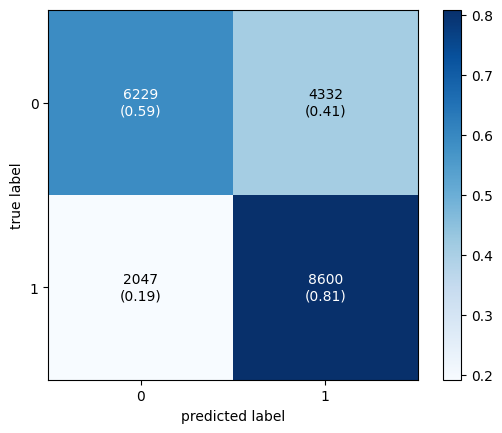

----------------------------------------------------------------------


In [187]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Chi-Squared with 10 features

In [188]:
data = splited_data[3]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [189]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:10<00:00,  2.54s/it]


In [190]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [191]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,skb 10,0.934968
0,Logistic Regression,skb 10,0.933397
3,KNN,skb 10,0.918150
2,Decision Tree,skb 10,0.909103


Logistic Regression with skb 10
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.87     10600
         1.0       0.92      0.80      0.86     10608

    accuracy                           0.87     21208
   macro avg       0.87      0.87      0.87     21208
weighted avg       0.87      0.87      0.87     21208



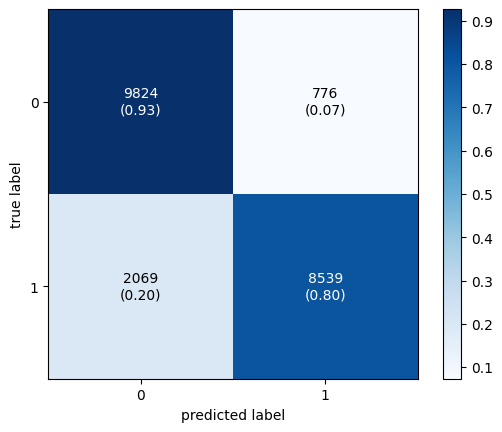

----------------------------------------------------------------------
Random Forest with skb 10
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87     10600
         1.0       0.93      0.78      0.85     10608

    accuracy                           0.86     21208
   macro avg       0.87      0.86      0.86     21208
weighted avg       0.87      0.86      0.86     21208



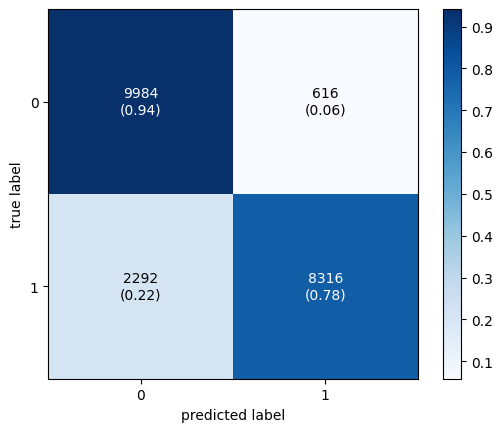

----------------------------------------------------------------------
Decision Tree with skb 10
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86     10600
         1.0       0.93      0.75      0.83     10608

    accuracy                           0.85     21208
   macro avg       0.86      0.85      0.85     21208
weighted avg       0.86      0.85      0.85     21208



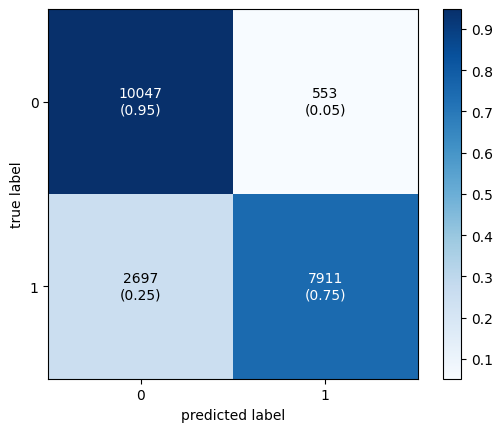

----------------------------------------------------------------------
KNN with skb 10
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     10600
         1.0       0.88      0.83      0.85     10608

    accuracy                           0.86     21208
   macro avg       0.86      0.86      0.86     21208
weighted avg       0.86      0.86      0.86     21208



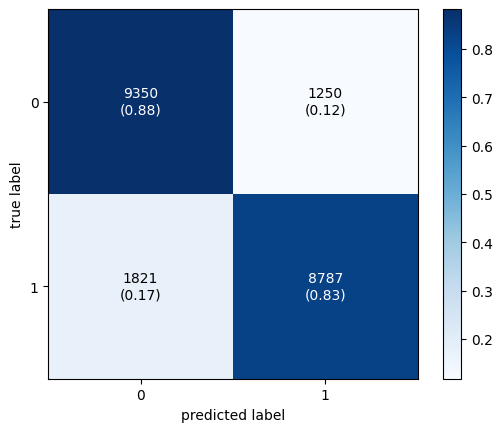

----------------------------------------------------------------------


In [192]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Pearson Correlation with 5 features

In [193]:
data = splited_data[4]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [194]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


In [195]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [196]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,pearson 5,0.914831
0,Logistic Regression,pearson 5,0.911973
2,Decision Tree,pearson 5,0.902316
3,KNN,pearson 5,0.874971


Logistic Regression with pearson 5
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84     10690
         1.0       0.88      0.78      0.82     10518

    accuracy                           0.83     21208
   macro avg       0.84      0.83      0.83     21208
weighted avg       0.84      0.83      0.83     21208



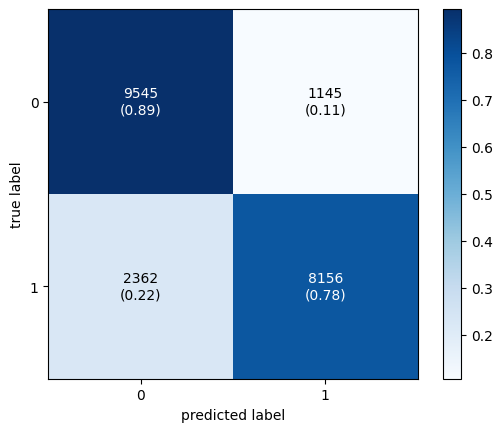

----------------------------------------------------------------------
Random Forest with pearson 5
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85     10690
         1.0       0.91      0.75      0.82     10518

    accuracy                           0.84     21208
   macro avg       0.85      0.84      0.84     21208
weighted avg       0.85      0.84      0.84     21208



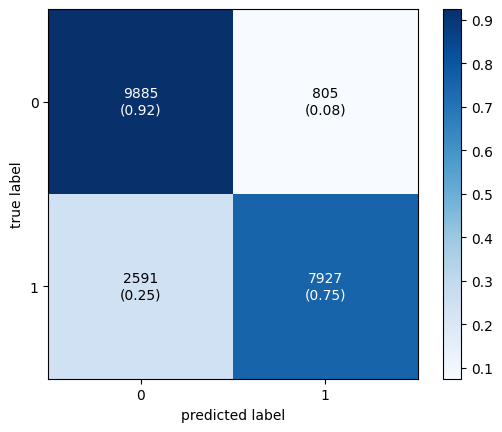

----------------------------------------------------------------------
Decision Tree with pearson 5
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     10690
         1.0       0.92      0.73      0.81     10518

    accuracy                           0.83     21208
   macro avg       0.85      0.83      0.83     21208
weighted avg       0.85      0.83      0.83     21208



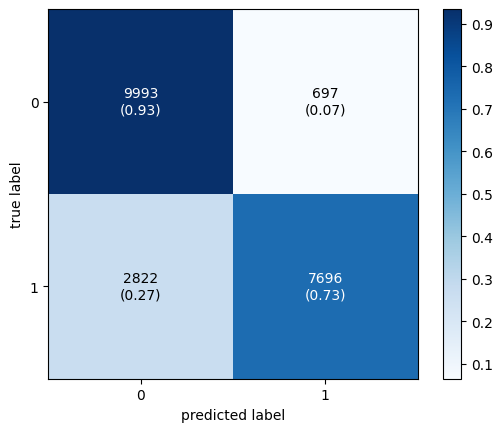

----------------------------------------------------------------------
KNN with pearson 5
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83     10690
         1.0       0.85      0.79      0.82     10518

    accuracy                           0.83     21208
   macro avg       0.83      0.83      0.83     21208
weighted avg       0.83      0.83      0.83     21208



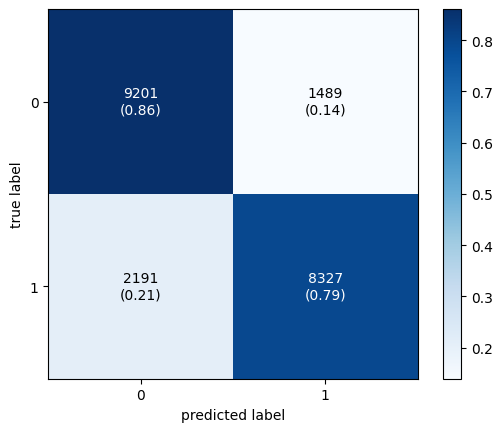

----------------------------------------------------------------------


In [197]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Pearson Correlation with 10 features

In [198]:
data = splited_data[5]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [199]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:09<00:00,  2.48s/it]


In [200]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [201]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,pearson 10,0.938891
0,Logistic Regression,pearson 10,0.938162
3,KNN,pearson 10,0.919998
2,Decision Tree,pearson 10,0.909066


Logistic Regression with pearson 10
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88     10549
         1.0       0.91      0.82      0.86     10659

    accuracy                           0.87     21208
   macro avg       0.87      0.87      0.87     21208
weighted avg       0.87      0.87      0.87     21208



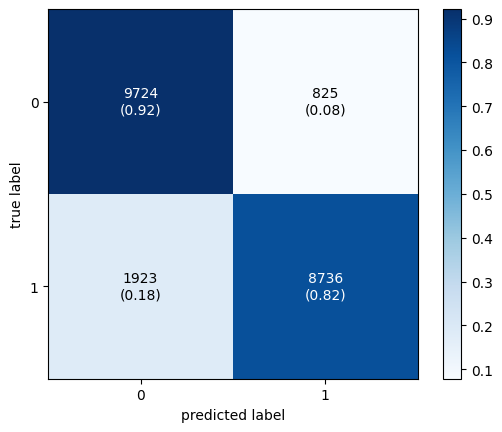

----------------------------------------------------------------------
Random Forest with pearson 10
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88     10549
         1.0       0.93      0.80      0.86     10659

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



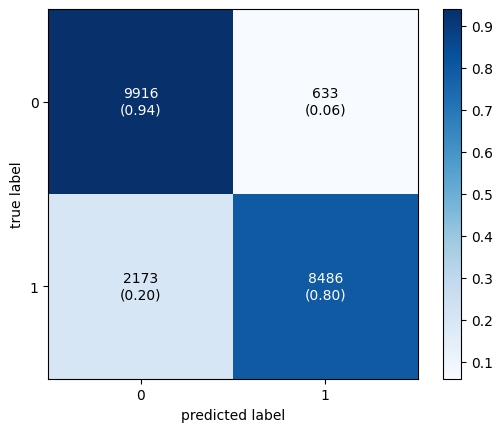

----------------------------------------------------------------------
Decision Tree with pearson 10
              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86     10549
         1.0       0.97      0.71      0.82     10659

    accuracy                           0.84     21208
   macro avg       0.87      0.84      0.84     21208
weighted avg       0.87      0.84      0.84     21208



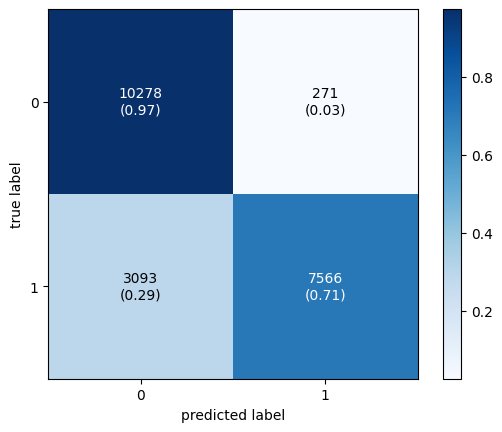

----------------------------------------------------------------------
KNN with pearson 10
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86     10549
         1.0       0.87      0.83      0.85     10659

    accuracy                           0.85     21208
   macro avg       0.85      0.85      0.85     21208
weighted avg       0.85      0.85      0.85     21208



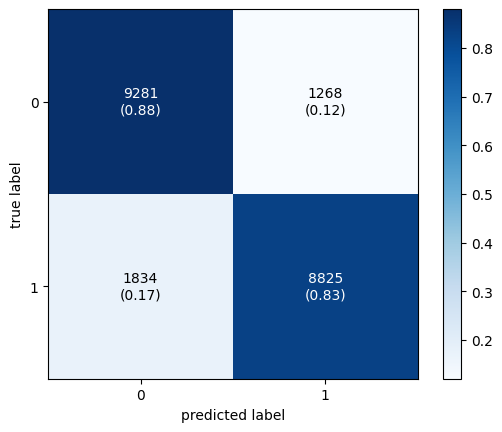

----------------------------------------------------------------------


In [202]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


## Best of Mutual Information, Chi-Squared and Pearson Correlation

In [203]:
data = splited_data[6]
models =[
    ['Logistic Regression', LogisticRegression(), data],
    ['Random Forest', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5), data],
    ['KNN', KNeighborsClassifier(n_neighbors= 6), data]
]

roc_list = []
pred_list = []


In [204]:
for name ,model, data in tqdm(models):
    X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 4/4 [00:08<00:00,  2.13s/it]


In [205]:
names = [name for name ,_ ,_ in models]
fsm = [data['name'] for _ ,_ ,data in models]
evaluation = pd.DataFrame({'Model': names,'Feature selection method': fsm ,'AUC Score': roc_list})

evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

In [206]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,Feature selection method,AUC Score
1,Random Forest,best 7,0.932623
0,Logistic Regression,best 7,0.928438
3,KNN,best 7,0.912206
2,Decision Tree,best 7,0.910648


Logistic Regression with best 7
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     10653
         1.0       0.91      0.80      0.85     10555

    accuracy                           0.86     21208
   macro avg       0.87      0.86      0.86     21208
weighted avg       0.87      0.86      0.86     21208



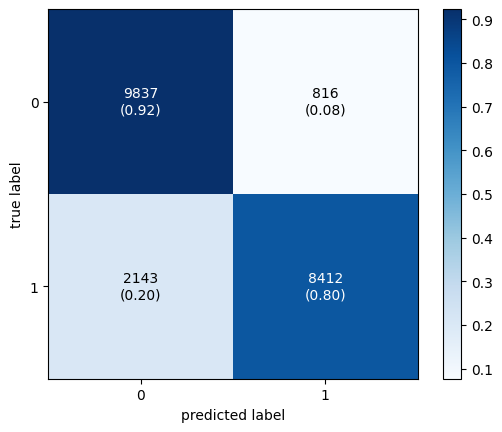

----------------------------------------------------------------------
Random Forest with best 7
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87     10653
         1.0       0.92      0.80      0.85     10555

    accuracy                           0.86     21208
   macro avg       0.87      0.86      0.86     21208
weighted avg       0.87      0.86      0.86     21208



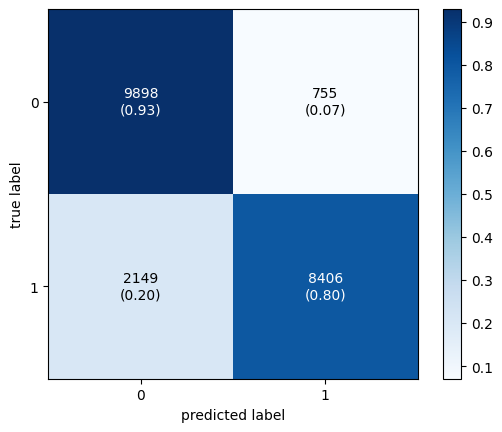

----------------------------------------------------------------------
Decision Tree with best 7
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86     10653
         1.0       0.93      0.75      0.83     10555

    accuracy                           0.85     21208
   macro avg       0.86      0.85      0.85     21208
weighted avg       0.86      0.85      0.85     21208



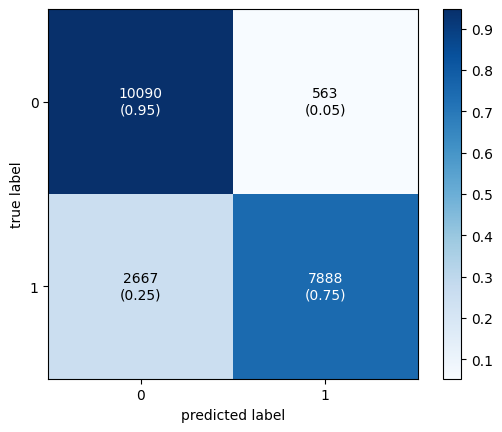

----------------------------------------------------------------------
KNN with best 7
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84     10653
         1.0       0.85      0.82      0.83     10555

    accuracy                           0.84     21208
   macro avg       0.84      0.84      0.84     21208
weighted avg       0.84      0.84      0.84     21208



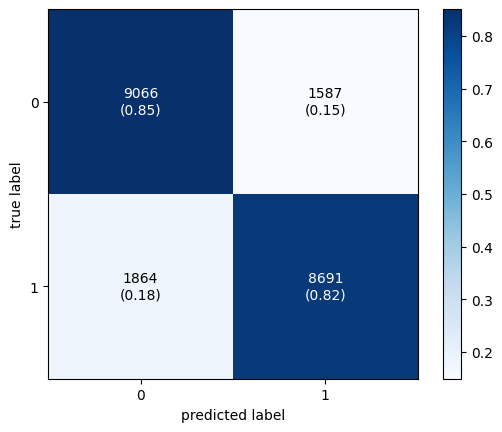

----------------------------------------------------------------------


In [207]:
for i, model in enumerate(models):
    
    print(model[0], "with", model[2]['name'])

    y_test = model[2]['y_test']
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test, y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


# Summary

In [208]:
evaluations = evaluations.sort_values(by='AUC Score', ascending=False)
evaluations

,Model,Feature selection method,AUC Score
1,Random Forest,all,0.944363
0,Logistic Regression,all,0.943576
9,Random Forest,mic 10,0.942192
8,Logistic Regression,mic 10,0.940757
25,Random Forest,pearson 10,0.938891
24,Logistic Regression,pearson 10,0.938162
17,Random Forest,skb 10,0.934968
16,Logistic Regression,skb 10,0.933397
29,Random Forest,best 7,0.932623
28,Logistic Regression,best 7,0.928438


## The best model is Random forest with 10 feature (Pearson Correlation)

In [209]:
high_score_features_pearson

['GenHlth',
 'Income',
 'DiffWalk',
 'PhysHlth',
 'Education',
 'PhysActivity',
 'BMI',
 'MentHlth',
 'HighBP',
 'HeartDiseaseorAttack']

In [210]:
classifier = RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced')
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(range(len(high_score_features_pearson)))),
    ])


model = Pipeline(steps=[
    ('precprocessor', preprocessor),
    ('classifier', classifier)
])

In [211]:
X = df_features[high_score_features_pearson]
y = df_target
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)

Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=1000))])

In [212]:
y_pred = model.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test,y_pred)
score

0.9389369340453327

# Save model

In [213]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('input', FloatTensorType([None, 10]))]

onx = convert_sklearn(model, initial_types=initial_type, options={'zipmap': False})

with open("diabetes-model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

/Users/helmy/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/helmy/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [214]:
import numpy
import onnxruntime as rt

sess = rt.InferenceSession("diabetes-model.onnx")
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

for t in sess.get_inputs():
    print("input:", t.name, t.type, t.shape)

for t in sess.get_outputs():
    print("output:", t.name, t.type, t.shape)

pred_onx = sess.run(
    [output_name], {input_name:X_test.values.astype(numpy.float32)})[0]

print(pred_onx[0:20])
print(y_test[0:20].values.astype(int))

input: input tensor(float) [None, 10]
output: label tensor(int64) [None]
output: probabilities tensor(float) [None, 2]
[0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0]
[0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0]
